In [33]:
import pandas as pd

train = pd.read_csv('final_train.csv')
test = pd.read_csv('final_test.csv')

In [10]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

lgb_params = {}
lgb_params['learning_rate'] = 0.013078
lgb_params['n_estimators'] = 2189
lgb_params['num_leaves'] = 357

#lgb_model = LGBMClassifier(**lgb_params)
cols = [c for c in train.columns if c not in ['is_churn','msno']]
X_train, X_test, y_train, y_test = train_test_split(train[cols],train['is_churn'])

#bst = lgb_model.fit(X_train, y_train)

In [41]:
from skopt.space import Real,Integer,Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.metrics import log_loss

space  = [Real(0.01,0.5, name='learning_rate'),
          Integer(10,100, name = 'num_leaves'),
          Integer(5, 150, name='max_bin'),
          Integer(5,500,name='n_estimators')]



@use_named_args(space)
def loss_function(**params):
    
    lgb_model = LGBMClassifier(**params)
    bst = lgb_model.fit(X_train, y_train)
    predicted_b = bst.predict_proba(X_test)
    return log_loss(y_test, predicted_b[:,1])

result_100_new = gp_minimize(loss_function,space,n_calls=100,random_state=0)

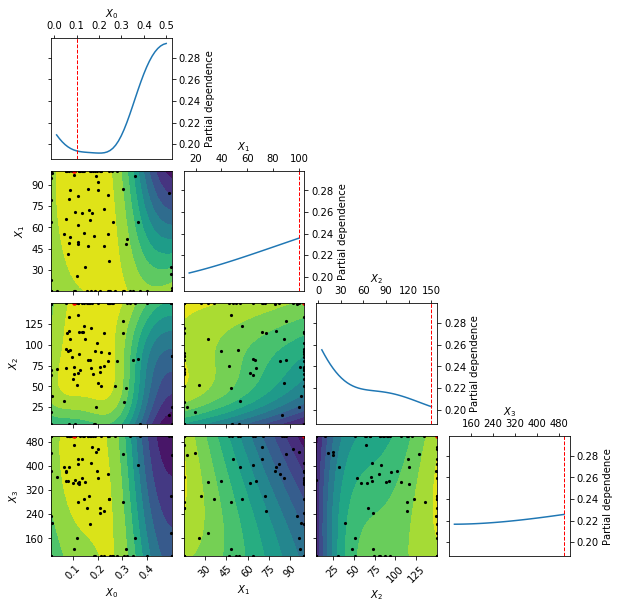

In [26]:
from skopt.plots import plot_objective
_ = plot_objective(result_100_new , size = 2)

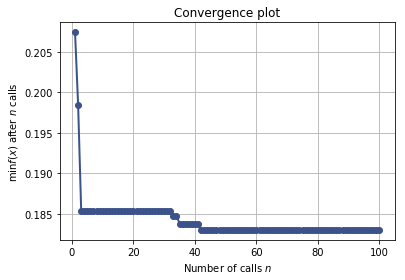

In [24]:
from skopt.plots import plot_convergence
plot_convergence(result_100_new);

In [1]:
from skopt.space import Real,Integer,Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.metrics import log_loss

space  = [Real(0.01,0.5, name='learning_rate'),
          
          Integer(5, 150, name='max_bin')]

@use_named_args(space)
def loss_function(**params):
    
    lgb_model = LGBMClassifier(**params)
    bst = lgb_model.fit(X_train, y_train)
    predicted_b = bst.predict_proba(X_test)
    return log_loss(y_test, predicted_b[:,1])

result_150 = gp_minimize(loss_function,space,n_calls=100,random_state=0)

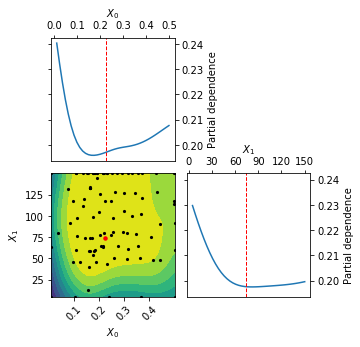

In [87]:
_ = plot_objective(result_150 , size = 2)

In [27]:
from sklearn.metrics import log_loss

y_pred = bst.predict_proba(X_test)
log_loss(y_test,y_pred[:,1:2])


0.18179214531375595

In [22]:
sample_submission = pd.read_csv('sample_submission_v2.csv')
sample_submission['is_churn'] = predictions[:,1:2]
sample_submission.to_csv('submission_test.csv',index=False)

* Adding K-fold cross validation to the objective function

In [38]:
from lightgbm import LGBMClassifier
from skopt.space import Real,Integer,Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.metrics import log_loss

space  = [Real(0.01,0.5, name='learning_rate'),
          Integer(10,200, name = 'num_leaves'),
          Integer(5, 200, name='max_bin'),
          Integer(5,200,name='n_estimators')]

@use_named_args(space)
def loss_function(**params):
    
    lgb_model = LGBMClassifier(**params)
    
    scores_list = []
    for train, test in kfold.split(X, y):

        bst = lgb_model.fit(X[train], y[train])
        predicted_b = bst.predict_proba(X[test])


        print(log_loss(y[test], predicted_b[:,1]))
        scores_list.append(log_loss(y[test], predicted_b[:,1]))
    

    #bst = lgb_model.fit(X_train, y_train)
    #predicted_b = bst.predict_proba(X_test)
    return np.mean(scores_list)

result_120_new_new = gp_minimize(loss_function,space,n_calls=120,random_state=0)

0.20866883223448843
0.20494339957898824
0.19196580755164844
0.23093775413458095
0.19202724986640995
0.19555536013608968
0.19378912428575362
0.19618971004573232
0.19605301667234012
0.19665132958367812
0.1866010595834901
0.18611448262351463
0.18421566907486056
0.18600612064476316
0.1873515923116178
0.18486495226736954
0.18445059305278771
0.18780444288765938
0.1846767181642962
0.1864617564371618
0.18820628502694947
0.18877732851632092
0.18779741166844602
0.18662187552732915
0.18875135559901718
0.18598220529522216
0.18931041401512227
0.18655593665085843
0.18909552822029504
0.18744498777144397
0.252455399147406
0.22626548746495137
0.24036885778162997
0.3196322938247797
0.2215574965072831
0.18966568242854911
0.19044950436289945
0.18935932654203588
0.1883415518317839
0.18915090308972277
0.20284395464195384
0.2036683473180773
0.20278080244070829
0.20286036831517293
0.20369675599930712
0.1875365180851878
0.1848270381219049
0.18814888925482273
0.18765375041486027
0.18803691035686151
0.2023736185

0.18494885128422348
0.1837120323743257
0.18519295092260735
0.18532361199899447
0.2098586920124211
0.20838318047510643
0.21028756328518475
0.20941892063798453
0.20898613992998089
0.23091238374354128
0.2302320247913429
0.23015118535546392
0.23153956016206081
0.23175676035430112
0.1892474087764559
0.18526312217009566
0.18457403553383353
0.202282877471814
0.18530238914188263
0.19432136146454507
0.18967125792461922
0.21269888879694948
0.19734768020678067
0.19087917899967244
0.18259514748410238
0.18442780575573578
0.1836538739017808
0.1834626168755336
0.18434636786737735
0.18426286359024702
0.1857022324089651
0.18675763325119898
0.18546948440787692
0.1852144253431061
0.1854881157969463
0.18628325199029983
0.18392530988619385
0.1853715273190427
0.18837404284043457
0.18199019057436483
0.18327910577736226
0.18443687183836863
0.1827800869269547
0.18407070965966785
0.19169275730125127
0.18797142160142194
0.191653580279532
0.18944457300666645
0.19097732120180003
0.22953878425625068
0.2306853568315

In [39]:
result_120_new_new

          fun: 0.18221195043183108
    func_vals: array([0.20570861, 0.19564771, 0.18605778, 0.18565169, 0.18803085,
       0.18767781, 0.25205591, 0.18939339, 0.20317005, 0.18724062,
       0.20274863, 0.20100386, 0.2173049 , 0.36127764, 0.21602511,
       0.20875238, 0.36301801, 0.23405335, 0.23112941, 0.22998191,
       0.1835307 , 0.18290951, 0.36040291, 0.18539496, 0.20234626,
       0.1838676 , 0.19991625, 0.19122275, 0.20678776, 0.23480924,
       0.23078888, 0.18359408, 0.18253028, 0.18371734, 0.18363223,
       0.18377352, 0.18487274, 0.24436044, 0.18269376, 0.18433246,
       0.18390542, 0.24493381, 0.20008917, 0.21579069, 0.18373142,
       0.20654936, 0.1843567 , 0.19047326, 0.18569168, 0.20801945,
       0.18221195, 0.18521132, 0.18443421, 0.19104761, 0.19616935,
       0.18428869, 0.18369883, 0.18602642, 0.19611069, 0.18396594,
       0.18349112, 0.18314631, 0.18257682, 0.26298535, 0.18652686,
       0.18346834, 0.19707007, 0.18435133, 0.23709031, 0.18757487,
       0.197

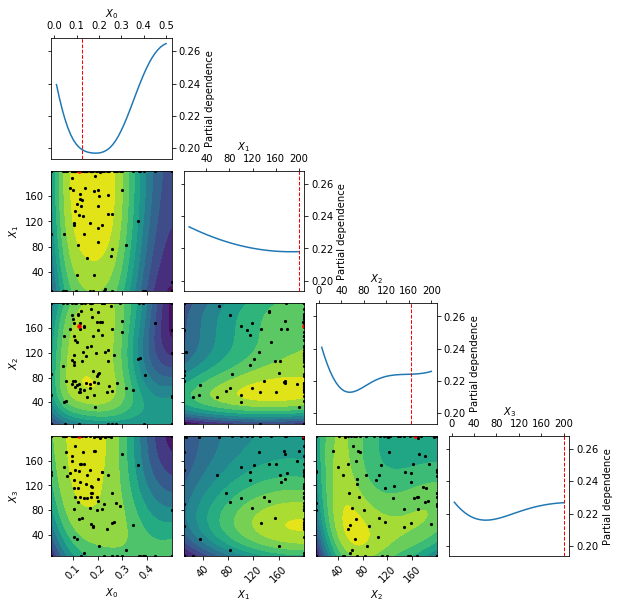

In [40]:
_ = plot_objective(result_120_new_new , size = 2)